In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [3]:
stock_prices.tail()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [4]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('&', 'and')

In [5]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [6]:
stock_prices.shape

(314, 11)

In [7]:
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]

Text(0.5, 1.0, 'Infosys Stock Price 31-03-2014 - 30-03-2020')

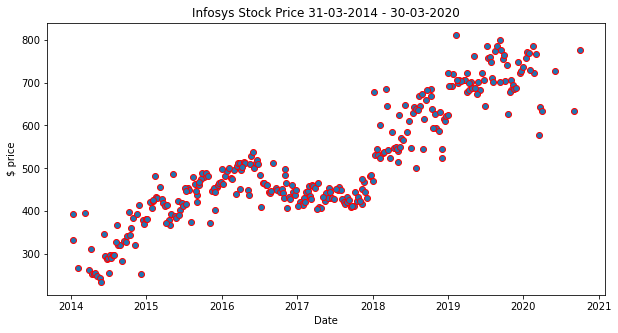

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Infosys'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Infosys Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Indian_Hotel Stock Price 31-03-2014 - 30-03-2020')

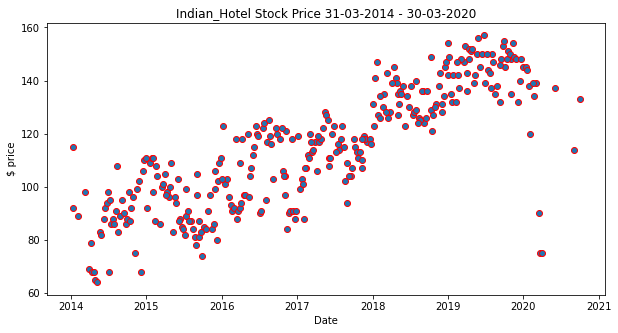

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Indian_Hotel'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Indian_Hotel Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Mahindra_and_Mahindra Stock Price 31-03-2014 - 30-03-2020')

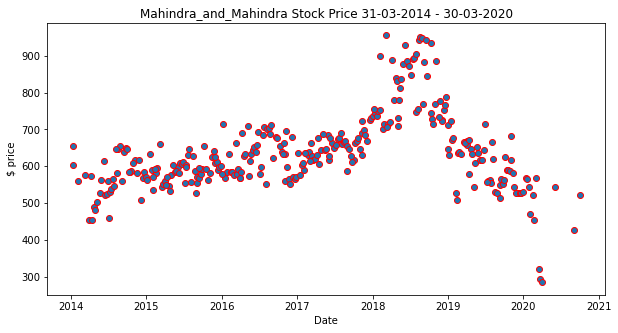

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Mahindra_and_Mahindra'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Mahindra_and_Mahindra Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Axis_Bank Stock Price 31-03-2014 - 30-03-2020')

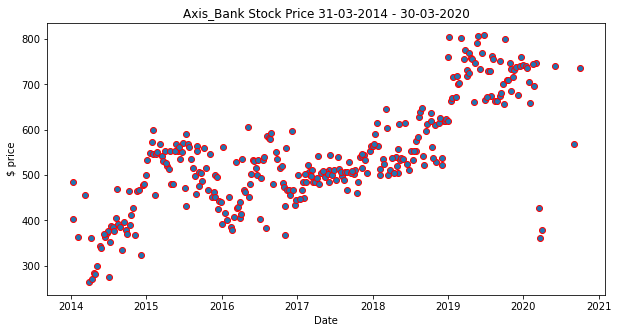

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Axis_Bank'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Axis_Bank Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'SAIL Stock Price 31-03-2014 - 30-03-2020')

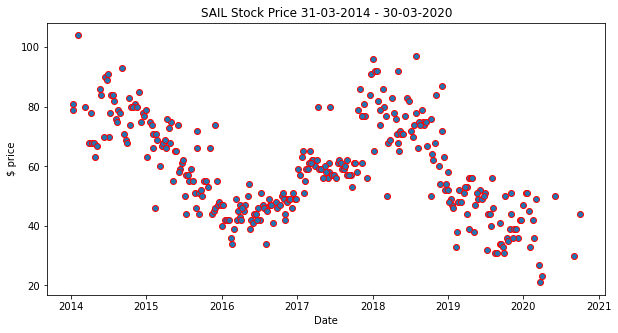

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['SAIL'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("SAIL Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Shree_Cement Stock Price 31-03-2014 - 30-03-2020')

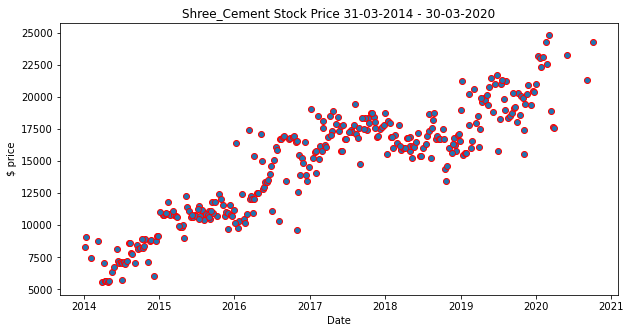

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Shree_Cement'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Shree_Cement Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Sun_Pharma Stock Price 31-03-2014 - 30-03-2020')

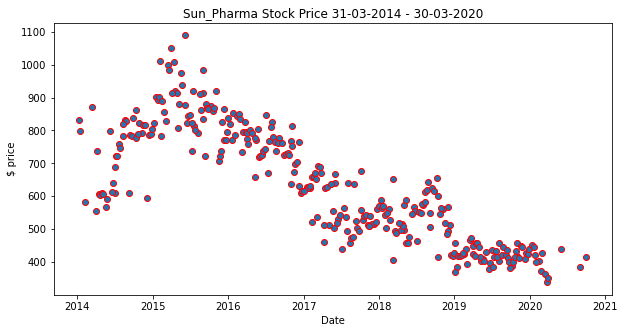

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Sun_Pharma'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Sun_Pharma Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Jindal_Steel Stock Price 31-03-2014 - 30-03-2020')

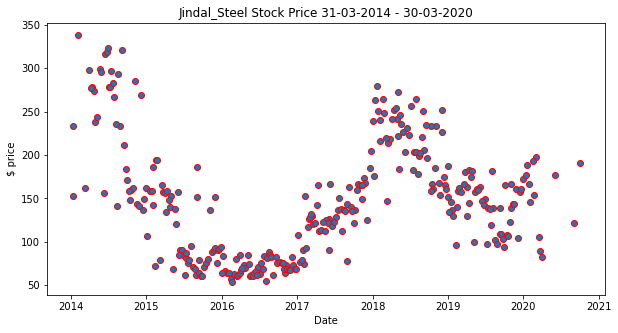

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Jindal_Steel'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Jindal_Steel Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Idea_Vodafone Stock Price 31-03-2014 - 30-03-2020')

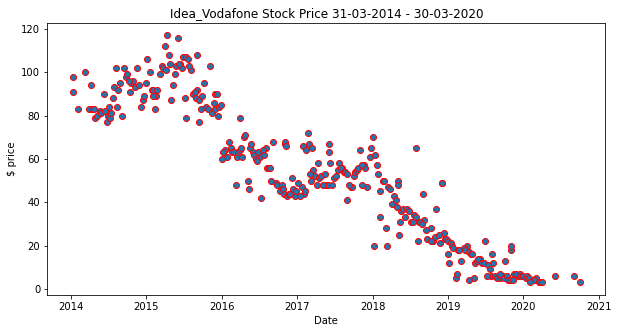

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Idea_Vodafone'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Idea_Vodafone Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Jet_Airways Stock Price 31-03-2014 - 30-03-2020')

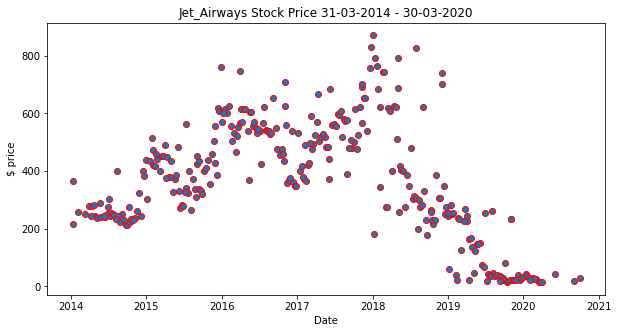

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Jet_Airways'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Jet_Airways Stock Price 31-03-2014 - 30-03-2020")

In [18]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   314 non-null    datetime64[ns]
 1   Infosys                314 non-null    int64         
 2   Indian_Hotel           314 non-null    int64         
 3   Mahindra_and_Mahindra  314 non-null    int64         
 4   Axis_Bank              314 non-null    int64         
 5   SAIL                   314 non-null    int64         
 6   Shree_Cement           314 non-null    int64         
 7   Sun_Pharma             314 non-null    int64         
 8   Jindal_Steel           314 non-null    int64         
 9   Idea_Vodafone          314 non-null    int64         
 10  Jet_Airways            314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


In [19]:
stock_prices.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,314,314,2016-08-08,1,2014-01-09,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Infosys,314.0,NaN,NaT,NaN,NaT,NaT,511.340764,135.952051,234.0,424.0,466.5,630.75,810.0
Indian_Hotel,314.0,NaN,NaT,NaN,NaT,NaT,114.56051,22.509732,64.0,96.0,115.0,134.0,157.0
Mahindra_and_Mahindra,314.0,NaN,NaT,NaN,NaT,NaT,636.678344,102.879975,284.0,572.0,625.0,678.0,956.0
Axis_Bank,314.0,NaN,NaT,NaN,NaT,NaT,540.742038,115.835569,263.0,470.5,528.0,605.25,808.0
SAIL,314.0,NaN,NaT,NaN,NaT,NaT,59.095541,15.810493,21.0,47.0,57.0,71.75,104.0
Shree_Cement,314.0,NaN,NaT,NaN,NaT,NaT,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,NaN,NaT,NaN,NaT,NaT,633.468153,171.855893,338.0,478.5,614.0,785.0,1089.0
Jindal_Steel,314.0,NaN,NaT,NaN,NaT,NaT,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,NaN,NaT,NaN,NaT,NaT,53.713376,31.248985,3.0,25.25,53.0,82.0,117.0


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

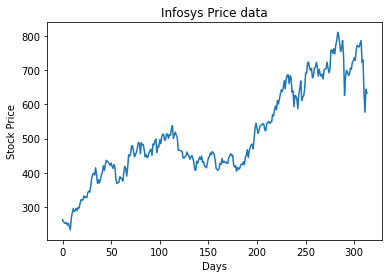

In [21]:
stock_prices['Infosys'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Infosys Price data")
plt.show()

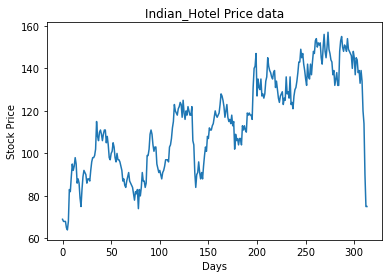

In [22]:
stock_prices['Indian_Hotel'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Indian_Hotel Price data")
plt.show()

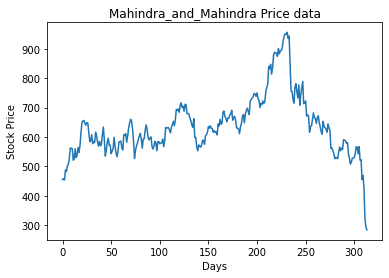

In [23]:
stock_prices['Mahindra_and_Mahindra'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Mahindra_and_Mahindra Price data")
plt.show()

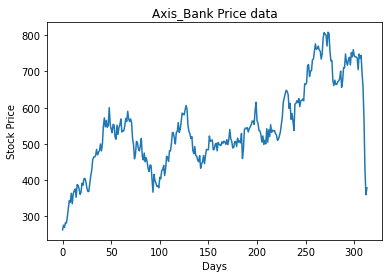

In [24]:
stock_prices['Axis_Bank'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Axis_Bank Price data")
plt.show()

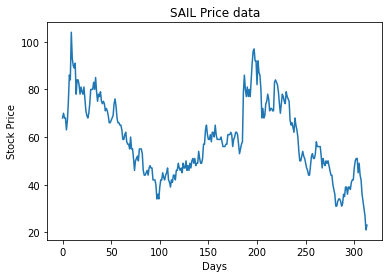

In [25]:
stock_prices['SAIL'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("SAIL Price data")
plt.show()

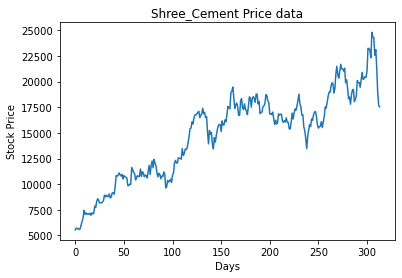

In [26]:
stock_prices['Shree_Cement'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Shree_Cement Price data")
plt.show()

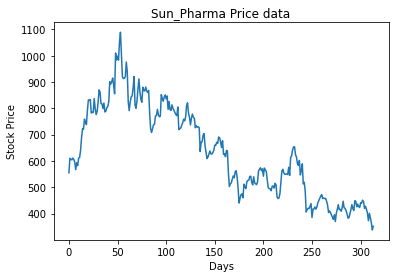

In [27]:
stock_prices['Sun_Pharma'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Sun_Pharma Price data")
plt.show()

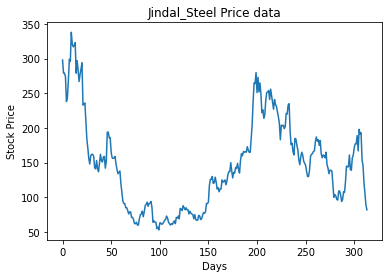

In [28]:
stock_prices['Jindal_Steel'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Jindal_Steel Price data")
plt.show()

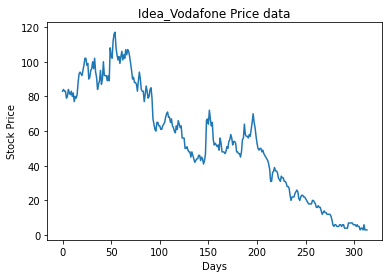

In [29]:
stock_prices['Idea_Vodafone'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Idea_Vodafone Price data")
plt.show()

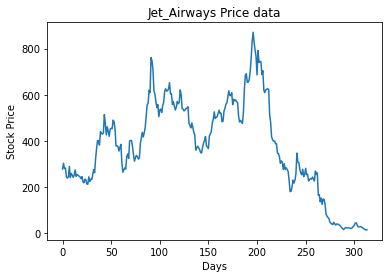

In [30]:
stock_prices['Jet_Airways'].plot()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Jet_Airways Price data")
plt.show()

In [31]:
Infosys_daily_returns = stock_prices['Infosys'].pct_change()
#Infosys_monthly_returns = stock_prices['Infosys'].resample('M').ffill().pct_change()


In [102]:
Infosys_daily_returns.sum()*100

106.7080998520312

In [103]:
df_cum_daily_returns_info = (1 + Infosys_daily_returns).cumprod() - 1

In [105]:
df_cum_daily_returns_info.tail()*100

309    176.136364
310    140.151515
311    118.560606
312    143.939394
313    139.772727
Name: Infosys, dtype: float64

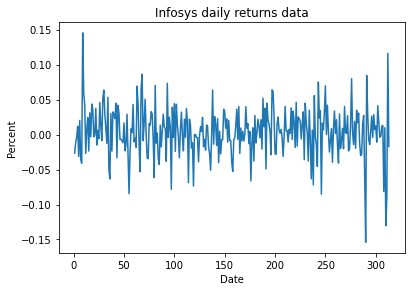

In [32]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Infosys_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Infosys daily returns data")
plt.show()

In [33]:
Indian_Hotel_daily_returns = stock_prices['Indian_Hotel'].pct_change()

In [107]:
Indian_Hotel_daily_returns.sum()*100

42.84056904895601

In [110]:
df_cum_daily_returns_Indian_Hotel = (1 + Indian_Hotel_daily_returns).cumprod() - 1

In [112]:
df_cum_daily_returns_Indian_Hotel.tail()*100

309    73.913043
310    65.217391
311    30.434783
312     8.695652
313     8.695652
Name: Indian_Hotel, dtype: float64

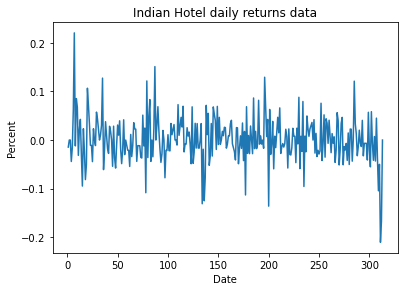

In [34]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Indian Hotel daily returns data")
plt.show()

In [35]:
Mahindra_and_Mahindra_daily_returns = stock_prices['Mahindra_and_Mahindra'].pct_change()

In [113]:
Mahindra_and_Mahindra_daily_returns.sum()*100

-22.447844138889607

In [114]:
df_cum_daily_returns_Mahindra = (1 + Mahindra_and_Mahindra_daily_returns).cumprod() - 1

In [115]:
df_cum_daily_returns_Mahindra.tail()*100

309     3.076923
310    -6.153846
311   -29.450549
312   -35.604396
313   -37.582418
Name: Mahindra_and_Mahindra, dtype: float64

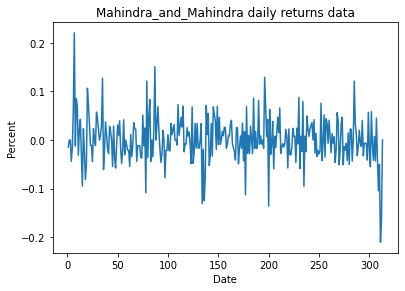

In [36]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Mahindra_and_Mahindra daily returns data")
plt.show()

In [37]:
Axis_Bank_daily_returns = stock_prices['Axis_Bank'].pct_change()

In [116]:
Axis_Bank_daily_returns.sum()*100

68.90439589944182

In [117]:
df_cum_daily_returns_Axis_Bank = (1 + Axis_Bank_daily_returns).cumprod() - 1

In [128]:
df_cum_daily_returns_Axis_Bank.tail()*100

309    150.190114
310    116.349810
311     62.737643
312     36.882129
313     44.106464
Name: Axis_Bank, dtype: float64

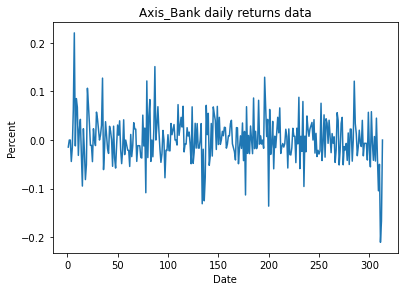

In [38]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Axis_Bank daily returns data")
plt.show()

In [86]:
SAIL_daily_returns = stock_prices['SAIL'].pct_change()

In [119]:
SAIL_daily_returns.sum()*100

-47.62107142738198

In [120]:
df_cum_daily_returns_SAIL = (1 + SAIL_daily_returns).cumprod() - 1

In [127]:
df_cum_daily_returns_SAIL.tail()*100

309   -51.470588
310   -55.882353
311   -60.294118
312   -69.117647
313   -66.176471
Name: SAIL, dtype: float64

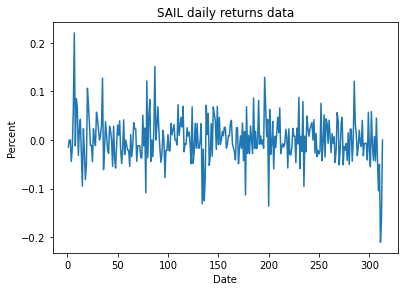

In [40]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("SAIL daily returns data")
plt.show()

In [88]:
Shree_Cement_daily_returns = stock_prices['Shree_Cement'].pct_change()

In [122]:
Shree_Cement_daily_returns.sum()*100

140.42917068013395

In [124]:
df_cum_daily_returns_Shree_Cement = (1 + Shree_Cement_daily_returns).cumprod() - 1

In [126]:
df_cum_daily_returns_Shree_Cement.tail()*100

309    316.922244
310    284.412773
311    241.042757
312    218.708281
313    216.543388
Name: Shree_Cement, dtype: float64

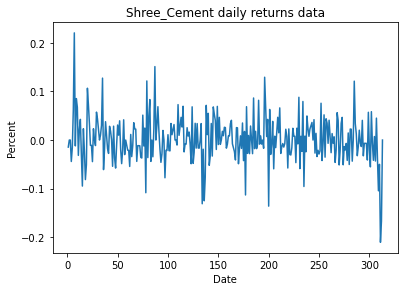

In [42]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Shree_Cement daily returns data")
plt.show()

In [90]:
Sun_Pharma_daily_returns = stock_prices['Sun_Pharma'].pct_change()

In [129]:
Sun_Pharma_daily_returns.sum()*100

-14.1017723698735

In [130]:
df_cum_daily_returns_Sun_Pharma = (1 + Sun_Pharma_daily_returns).cumprod() - 1

In [131]:
df_cum_daily_returns_Sun_Pharma.tail()*100

309   -27.747748
310   -30.810811
311   -34.234234
312   -39.099099
313   -36.576577
Name: Sun_Pharma, dtype: float64

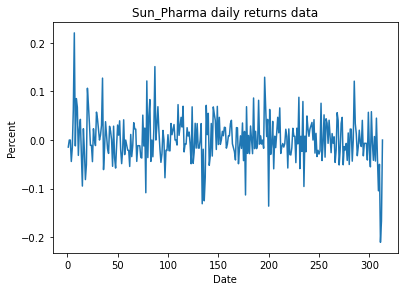

In [44]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Sun_Pharma daily returns data")
plt.show()

In [92]:
Jindal_Steel_daily_returns = stock_prices['Jindal_Steel'].pct_change()

In [132]:
Jindal_Steel_daily_returns.sum()*100

-41.08866152199002

In [133]:
df_cum_daily_returns_Jindal_Steel = (1 + Jindal_Steel_daily_returns).cumprod() - 1

In [135]:
df_cum_daily_returns_Jindal_Steel.tail()*100

309   -51.006711
310   -59.395973
311   -64.765101
312   -70.134228
313   -72.483221
Name: Jindal_Steel, dtype: float64

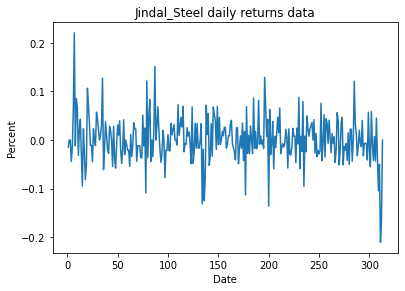

In [46]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Jindal_Steel daily returns data")
plt.show()

In [94]:
Idea_Vodafone_daily_returns = stock_prices['Idea_Vodafone'].pct_change()

In [98]:
Idea_Vodafone_daily_returns.sum()*100

-158.9993475403116

In [100]:
df_cum_daily_returns = (1 + Idea_Vodafone_daily_returns).cumprod() - 1

In [106]:
df_cum_daily_returns.tail()*100

309   -96.385542
310   -92.771084
311   -96.385542
312   -96.385542
313   -96.385542
Name: Idea_Vodafone, dtype: float64

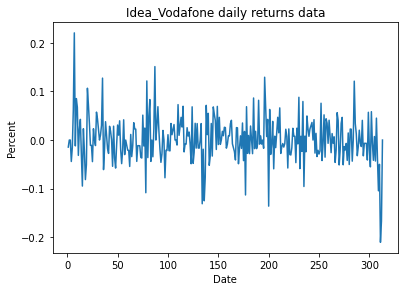

In [48]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Idea_Vodafone daily returns data")
plt.show()

In [96]:
Jet_Airways_daily_returns = stock_prices['Jet_Airways'].pct_change()

In [136]:
Jet_Airways_daily_returns.sum()*100

-150.38924200927096

In [137]:
df_cum_daily_returns_Jet_Airways = (1 + Jet_Airways_daily_returns).cumprod() - 1

In [138]:
df_cum_daily_returns_Jet_Airways.tail()*100

309   -92.086331
310   -93.525180
311   -94.244604
312   -94.964029
313   -94.964029
Name: Jet_Airways, dtype: float64

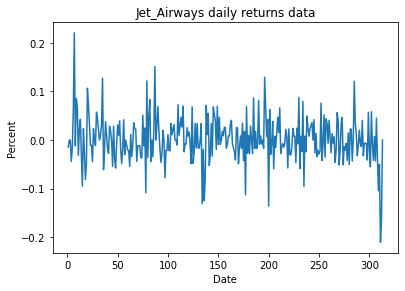

In [50]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(Indian_Hotel_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Jet_Airways daily returns data")
plt.show()

In [51]:
Infosys_cum_returns = (Infosys_daily_returns + 1).cumprod()
Indian_Hotel_cum_returns = (Indian_Hotel_daily_returns + 1).cumprod()
Mahindra_and_Mahindra_cum_returns = (Mahindra_and_Mahindra_daily_returns + 1).cumprod()
Axis_Bank_cum_returns = (Axis_Bank_daily_returns + 1).cumprod()
SAIL_cum_returns = (SAIL_daily_returns + 1).cumprod()
Shree_Cement_cum_returns = (Shree_Cement_daily_returns + 1).cumprod()
Sun_Pharma_returns = (Sun_Pharma_daily_returns + 1).cumprod()
Jindal_Steel_cum_returns = (Jindal_Steel_daily_returns + 1).cumprod()
Idea_Vodafone_cum_returns = (Idea_Vodafone_daily_returns + 1).cumprod()
Jet_Airways_cum_returns = (Jet_Airways_daily_returns + 1).cumprod()

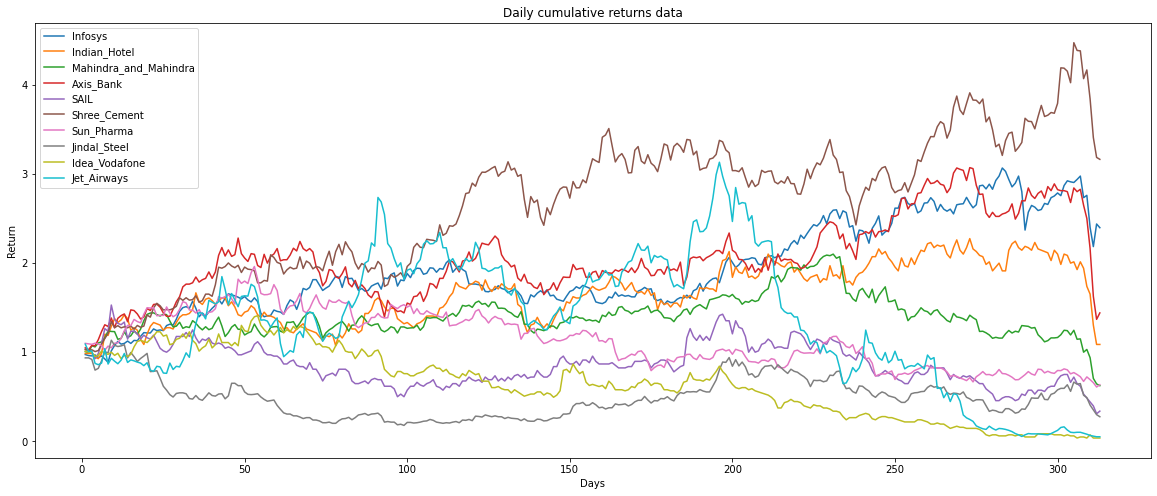

In [52]:
fig = plt.figure(figsize=(20, 8))
#ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
Infosys_cum_returns.plot()
Indian_Hotel_cum_returns.plot()
Mahindra_and_Mahindra_cum_returns.plot()
Axis_Bank_cum_returns.plot()
SAIL_cum_returns.plot()
Shree_Cement_cum_returns.plot()
Sun_Pharma_returns.plot()
Jindal_Steel_cum_returns.plot()
Idea_Vodafone_cum_returns.plot()
Jet_Airways_cum_returns.plot()
plt.xlabel("Days")
plt.ylabel("Return")
plt.legend()
plt.title("Daily cumulative returns data")
plt.show()

In [53]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [54]:
print('Infosys mean:',stock_prices.Infosys.mean())
print('Indian_Hotel mean:',stock_prices.Indian_Hotel.mean())
print('Mahindra_and_Mahindra mean:',stock_prices.Mahindra_and_Mahindra.mean())
print('Axis_Bank mean:',stock_prices.Infosys.mean())
print('SAIL mean:',stock_prices.Indian_Hotel.mean())
print('Shree_Cement mean:',stock_prices.Mahindra_and_Mahindra.mean())
print('Sun_Pharma mean:',stock_prices.Infosys.mean())
print('Jindal_Steel mean:',stock_prices.Indian_Hotel.mean())
print('Idea_Vodafone mean:',stock_prices.Mahindra_and_Mahindra.mean())
print('Jet_Airways mean:',stock_prices.Mahindra_and_Mahindra.mean())

Infosys mean: 511.3407643312102
Indian_Hotel mean: 114.56050955414013
Mahindra_and_Mahindra mean: 636.6783439490446
Axis_Bank mean: 511.3407643312102
SAIL mean: 114.56050955414013
Shree_Cement mean: 636.6783439490446
Sun_Pharma mean: 511.3407643312102
Jindal_Steel mean: 114.56050955414013
Idea_Vodafone mean: 636.6783439490446
Jet_Airways mean: 636.6783439490446


In [55]:
print('Infosys Standard Deviation:',stock_prices.Infosys.std())
print('Indian_Hotel Standard Deviation:',stock_prices.Indian_Hotel.std())
print('Mahindra_and_Mahindra Standard Deviation:',stock_prices.Mahindra_and_Mahindra.std())
print('Axis_Bank Standard Deviation:',stock_prices.Infosys.std())
print('SAIL Standard Deviation:',stock_prices.Indian_Hotel.std())
print('Shree_Cement Standard Deviation:',stock_prices.Mahindra_and_Mahindra.std())
print('Sun_Pharma Standard Deviation:',stock_prices.Infosys.std())
print('Jindal_Steel Standard Deviation:',stock_prices.Indian_Hotel.std())
print('Idea_Vodafone Standard Deviation:',stock_prices.Mahindra_and_Mahindra.std())
print('Jet_Airways Standard Deviation:',stock_prices.Mahindra_and_Mahindra.std())

Infosys Standard Deviation: 135.95205105475753
Indian_Hotel Standard Deviation: 22.509731677361458
Mahindra_and_Mahindra Standard Deviation: 102.87997462130035
Axis_Bank Standard Deviation: 135.95205105475753
SAIL Standard Deviation: 22.509731677361458
Shree_Cement Standard Deviation: 102.87997462130035
Sun_Pharma Standard Deviation: 135.95205105475753
Jindal_Steel Standard Deviation: 22.509731677361458
Idea_Vodafone Standard Deviation: 102.87997462130035
Jet_Airways Standard Deviation: 102.87997462130035


In [56]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [57]:
df1 = stock_prices[['Date','Infosys']].copy()
df1.set_index('Date')

,Infosys
Date,
2014-03-31,264
2014-07-04,257
2014-04-14,254
2014-04-21,253
2014-04-28,256
...,...
2020-02-03,729
2020-09-03,634
2020-03-16,577


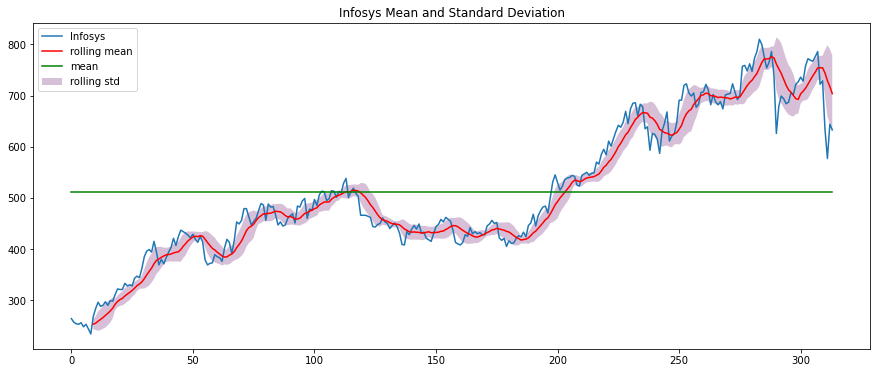

In [58]:



ma = df1['Infosys'].rolling(10).mean()
mn = df1['mn'] = df1['Infosys'].mean()
mstd = df1['Infosys'].rolling(10).std()
mn = df1['std'] = df1['Infosys'].std()
plt.figure(figsize=(15,6))
stock_prices['Infosys'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df1['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='thistle',label='rolling std')
plt.title("Infosys Mean and Standard Deviation")
plt.legend()
plt.show()

In [59]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [60]:
df2 = stock_prices[['Date','Indian_Hotel']].copy()
df2.set_index('Date')

,Indian_Hotel
Date,
2014-03-31,69
2014-07-04,68
2014-04-14,68
2014-04-21,68
2014-04-28,65
...,...
2020-02-03,120
2020-09-03,114
2020-03-16,90


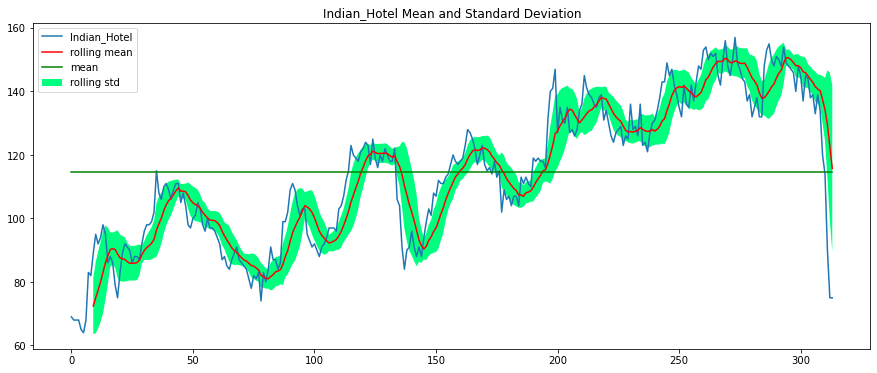

In [61]:



ma = df2['Indian_Hotel'].rolling(10).mean()
mn = df2['mn'] = df2['Indian_Hotel'].mean()
mstd = df2['Indian_Hotel'].rolling(10).std()
mn = df2['std'] = df2['Indian_Hotel'].std()
plt.figure(figsize=(15,6))
stock_prices['Indian_Hotel'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df2['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='springgreen',label='rolling std')
plt.title("Indian_Hotel Mean and Standard Deviation")
plt.legend()

plt.show()

In [62]:
df3 = stock_prices[['Date','Mahindra_and_Mahindra']].copy()
df3.set_index('Date')

,Mahindra_and_Mahindra
Date,
2014-03-31,455
2014-07-04,458
2014-04-14,454
2014-04-21,488
2014-04-28,482
...,...
2020-02-03,469
2020-09-03,427
2020-03-16,321


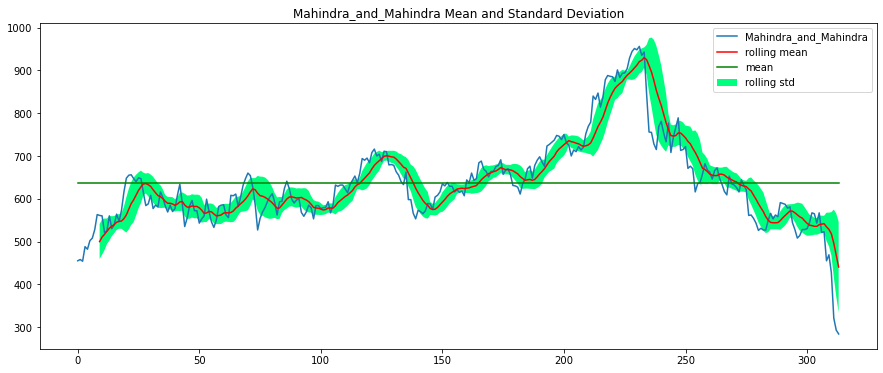

In [63]:



ma = df3['Mahindra_and_Mahindra'].rolling(10).mean()
mn = df3['mn'] = df3['Mahindra_and_Mahindra'].mean()
mstd = df3['Mahindra_and_Mahindra'].rolling(10).std()
mn = df3['std'] = df3['Mahindra_and_Mahindra'].std()
plt.figure(figsize=(15,6))
stock_prices['Mahindra_and_Mahindra'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df3['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='springgreen',label='rolling std')
plt.title("Mahindra_and_Mahindra Mean and Standard Deviation")
plt.legend()

plt.show()

In [64]:
df4 = stock_prices[['Date','Axis_Bank']].copy()
df4.set_index('Date')

,Axis_Bank
Date,
2014-03-31,263
2014-07-04,276
2014-04-14,270
2014-04-21,283
2014-04-28,282
...,...
2020-02-03,658
2020-09-03,569
2020-03-16,428


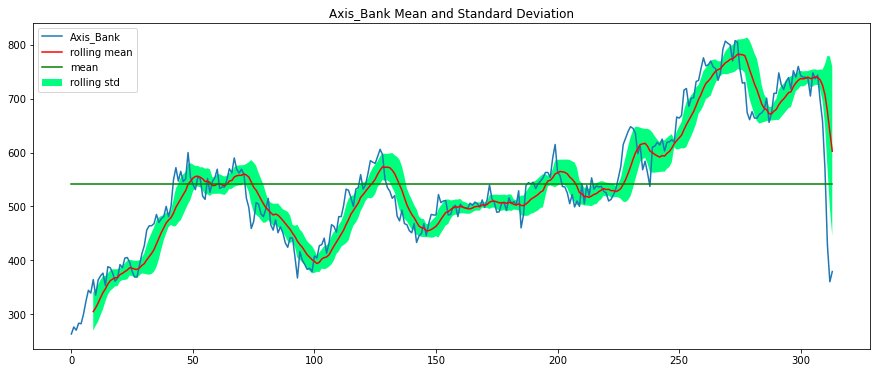

In [65]:



ma = df4['Axis_Bank'].rolling(10).mean()
mn = df4['mn'] = df4['Axis_Bank'].mean()
mstd = df4['Axis_Bank'].rolling(10).std()
mn = df4['std'] = df4['Axis_Bank'].std()
plt.figure(figsize=(15,6))
stock_prices['Axis_Bank'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df4['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='springgreen',label='rolling std')
plt.title("Axis_Bank Mean and Standard Deviation")
plt.legend()

plt.show()

In [66]:
df5 = stock_prices[['Date','SAIL']].copy()
df5.set_index('Date')

,SAIL
Date,
2014-03-31,68
2014-07-04,70
2014-04-14,68
2014-04-21,68
2014-04-28,63
...,...
2020-02-03,33
2020-09-03,30
2020-03-16,27


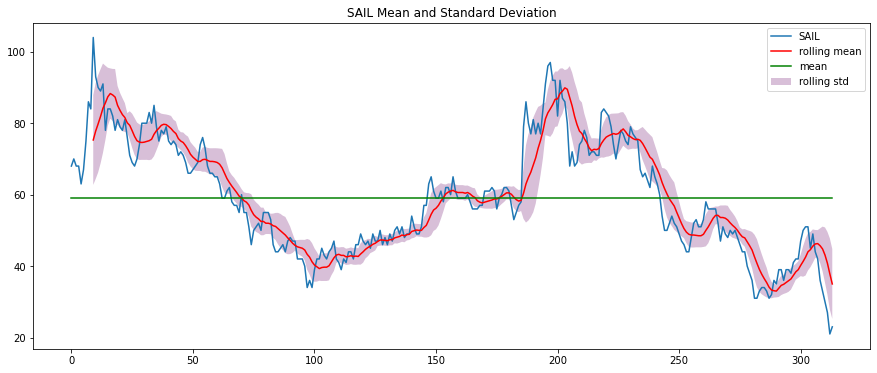

In [67]:



ma = df5['SAIL'].rolling(10).mean()
mn = df5['mn'] = df5['SAIL'].mean()
mstd = df5['SAIL'].rolling(10).std()
mn = df5['std'] = df5['SAIL'].std()
plt.figure(figsize=(15,6))
stock_prices['SAIL'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df5['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='thistle',label='rolling std')
plt.title("SAIL Mean and Standard Deviation")
plt.legend()

plt.show()

In [68]:
df6 = stock_prices[['Date','Shree_Cement']].copy()
df6.set_index('Date')

,Shree_Cement
Date,
2014-03-31,5543
2014-07-04,5728
2014-04-14,5649
2014-04-21,5692
2014-04-28,5582
...,...
2020-02-03,23110
2020-09-03,21308
2020-03-16,18904


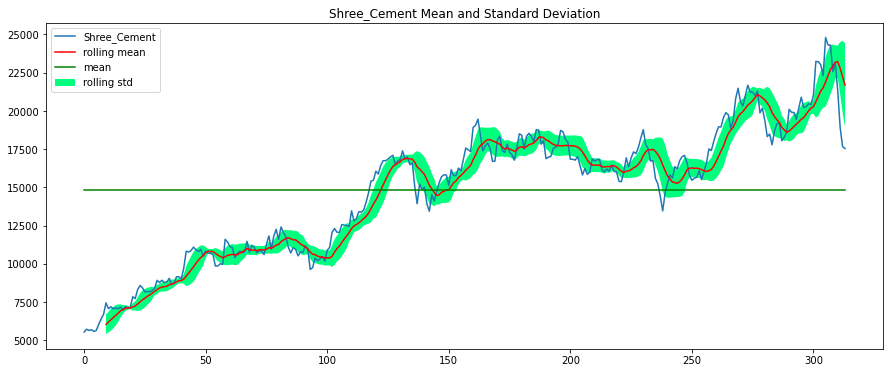

In [69]:



ma = df6['Shree_Cement'].rolling(10).mean()
mn = df6['mn'] = df6['Shree_Cement'].mean()
mstd = df6['Shree_Cement'].rolling(10).std()
mn = df6['std'] = df6['Shree_Cement'].std()
plt.figure(figsize=(15,6))
stock_prices['Shree_Cement'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df6['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='springgreen',label='rolling std')
plt.title("Shree_Cement Mean and Standard Deviation")
plt.legend()

plt.show()

In [70]:
df7 = stock_prices[['Date','Sun_Pharma']].copy()
df7.set_index('Date')

,Sun_Pharma
Date,
2014-03-31,555
2014-07-04,610
2014-04-14,607
2014-04-21,604
2014-04-28,611
...,...
2020-02-03,401
2020-09-03,384
2020-03-16,365


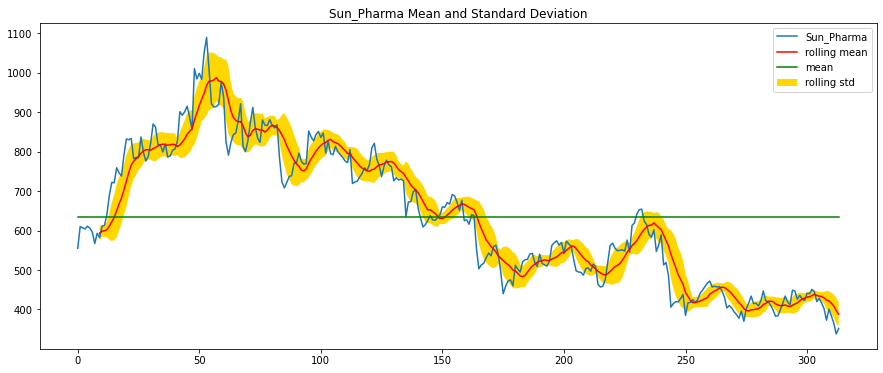

In [71]:



ma = df7['Sun_Pharma'].rolling(10).mean()
mn = df7['mn'] = df7['Sun_Pharma'].mean()
mstd = df7['Sun_Pharma'].rolling(10).std()
mn = df7['std'] = df7['Sun_Pharma'].std()
plt.figure(figsize=(15,6))
stock_prices['Sun_Pharma'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df7['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='gold',label='rolling std')
plt.title("Sun_Pharma Mean and Standard Deviation")
plt.legend()

plt.show()

In [72]:
df8 = stock_prices[['Date','Jindal_Steel']].copy()
df8.set_index('Date')

,Jindal_Steel
Date,
2014-03-31,298
2014-07-04,279
2014-04-14,279
2014-04-21,274
2014-04-28,238
...,...
2020-02-03,146
2020-09-03,121
2020-03-16,105


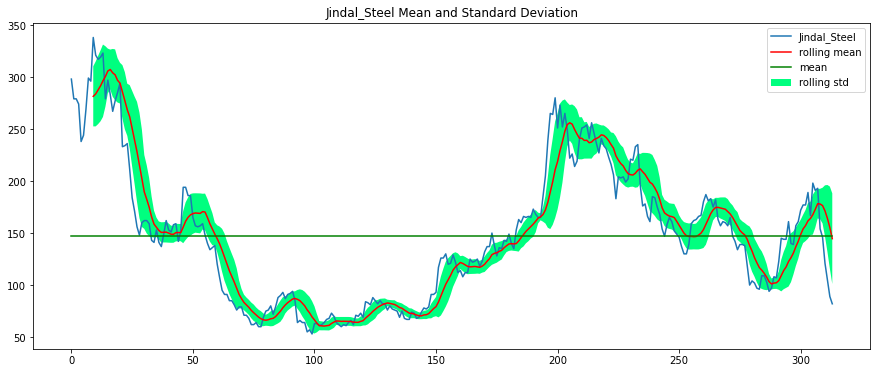

In [73]:



ma = df8['Jindal_Steel'].rolling(10).mean()
mn = df8['mn'] = df8['Jindal_Steel'].mean()
mstd = df8['Jindal_Steel'].rolling(10).std()
mn = df8['std'] = df8['Jindal_Steel'].std()
plt.figure(figsize=(15,6))
stock_prices['Jindal_Steel'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df8['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='springgreen',label='rolling std')
plt.title("Jindal_Steel Mean and Standard Deviation")
plt.legend()

plt.show()

In [74]:
df9 = stock_prices[['Date','Idea_Vodafone']].copy()
df9.set_index('Date')

,Idea_Vodafone
Date,
2014-03-31,83
2014-07-04,84
2014-04-14,83
2014-04-21,83
2014-04-28,79
...,...
2020-02-03,3
2020-09-03,6
2020-03-16,3


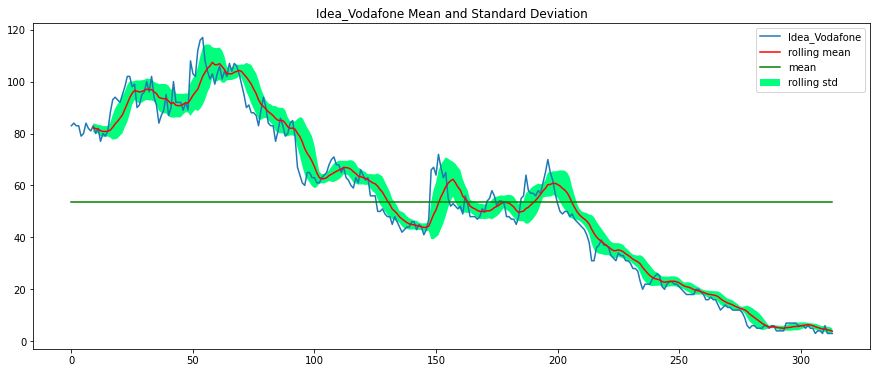

In [75]:



ma = df9['Idea_Vodafone'].rolling(10).mean()
mn = df9['mn'] = df9['Idea_Vodafone'].mean()
mstd = df9['Idea_Vodafone'].rolling(10).std()
mn = df9['std'] = df9['Idea_Vodafone'].std()
plt.figure(figsize=(15,6))
stock_prices['Idea_Vodafone'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df9['mn'], "g",label='mean')
plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='springgreen',label='rolling std')
plt.title("Idea_Vodafone Mean and Standard Deviation")
plt.legend()

plt.show()

In [76]:
df10 = stock_prices[['Date','Jet_Airways']].copy()
df10.set_index('Date')

,Jet_Airways
Date,
2014-03-31,278
2014-07-04,303
2014-04-14,280
2014-04-21,282
2014-04-28,243
...,...
2020-02-03,22
2020-09-03,18
2020-03-16,16


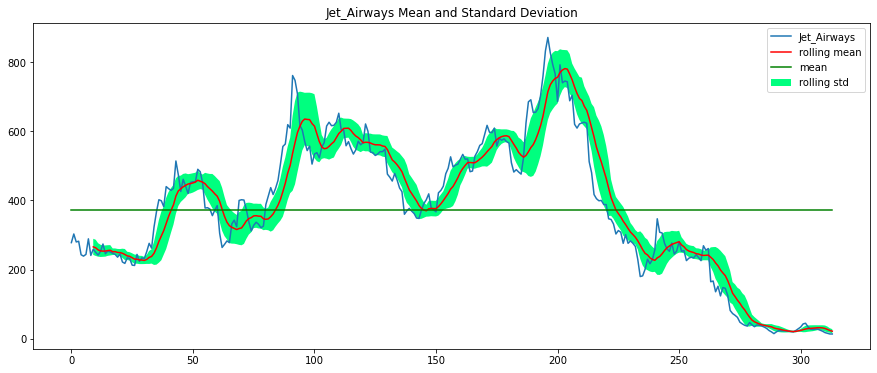

In [77]:



ma = df10['Jet_Airways'].rolling(10).mean()
mn = df10['mn'] = df10['Jet_Airways'].mean(axis=0)
mstd = df10['Jet_Airways'].rolling(10).std()
std = df10['std'] = df10['Jet_Airways'].std(axis=0)
plt.figure(figsize=(15,6))
stock_prices['Jet_Airways'].plot()

plt.plot(ma.index, ma, "r",label='rolling mean')
plt.plot( df10['mn'], "g",label='mean')

plt.fill_between(ma.index, (ma-mstd), (ma+mstd), facecolor='springgreen',label='rolling std')
plt.title("Jet_Airways Mean and Standard Deviation")
plt.legend()

plt.show()



In [78]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')